# Линейная регрессия II

## План занятия:
    1. Применение линейной регрессии на реальных данных
    2. Нормализация данных
    3. Переобучение и недообучение
    4. Полиномиальная регрессия

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from regression2_helper import * # Подгружаем функции для визуализации
import numpy as np              # Подгруджаем библиотеку NumPy
np.set_printoptions(formatter={'float': lambda x: format(x, '6.3f')}) # настройка вывода для матриц

# Применение линейной регрессии на реальных данных

Рассмотрим реальный датасет содержащий данные о стоимости жилья в Бостоне.  
Данные были собраны в 1978 году и содержат 506 записей, представляющие собой 14 агрегированных характеристик домов из пригородов Бостона, штат Массачусетс.

1. CRIM: Уровень преступности  
2. ZN: Доля жилой земли, отведенной под участки более 25000 кв. Футов  
3. INDUS: Доля неторговых площадей на город  
4. CHAS: Фиктивная переменная реки Чарльз (= 1, если путь ограничивает реку; 0 в противном случае)  
5. NOX: Концентрация оксида азота  
6. RM: Среднее количество комнат в доме  
7. AGE: Доля домов, построенных до 1940 года  
8. DIS: Взвешенные расстояния до пяти бостонских центров занятости  
9. RAD: Индекс доступности к радиальным магистралям  
10. TAX: Ставка налога на полную стоимость имущества за 10000 долларов США  
11. PTRATIO: Соотношение учеников и учителей по городам   
12. B: $1000(Bk - 0,63)^2$, где $Bk$ - это доля людей афроамериканского происхождения по городам  
13. LSTAT: процент населения с более низким статусом чем у жильца  
14. MEDV: медианая цена за дом с такими параметрами в 1000$

Наша задача будет предсказать цену домов (MEDV) используя данные характеристики

Для начала  построим модель линейной регрессии для предсказания медианной цены домов,   
используюя всего два признака: RM и LSTAT

In [3]:
#загрузим данные
X_room, X_lstat, y = load_small_data()

In [4]:
print_3d_table_with_data(X_room, X_lstat, y)

    Cреднее количество комнат  LSTAT %  Цена квартиры, $1000$
0                       6.575     4.98                   24.0
1                       6.421     9.14                   21.6
2                       7.185     4.03                   34.7
3                       6.998     2.94                   33.4
4                       7.147     5.33                   36.2
5                       6.430     5.21                   28.7
6                       6.012    12.43                   22.9
7                       6.172    19.15                   27.1
8                       5.631    29.93                   16.5
9                       6.004    17.10                   18.9
10                      6.377    20.45                   15.0
11                      6.009    13.27                   18.9
12                      5.889    15.71                   21.7
13                      5.949     8.26                   20.4
14                      6.096    10.26                   18.2
15      

Рассмотрим зависимости каждого из признаков с ценой.

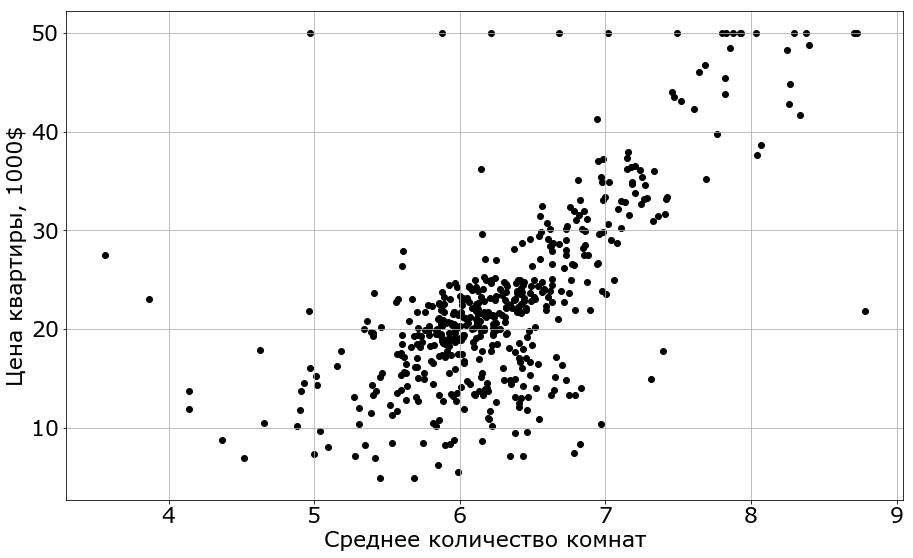

In [5]:
plot_rm(X_room, y)

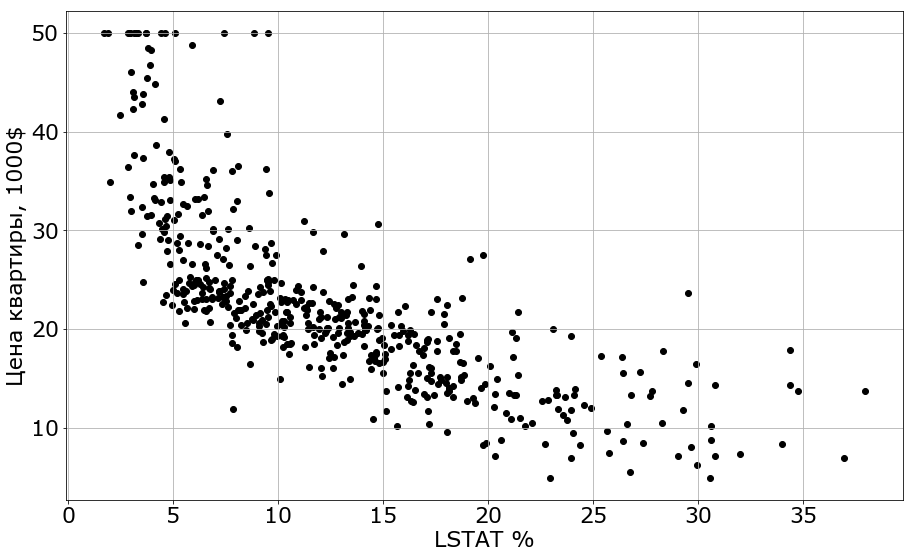

In [6]:
plot_lstat(X_lstat, y)

Рассмотрим теперь зависимость от двух признаков.

In [7]:
plot_new_3d_data(X_room, X_lstat, y)

A Jupyter Widget

## Функция от двух параметров

Для предсказания цен квартир в бостоне по данной паре признаков, рассмотрим модель линейной регрессию вида:
\begin{equation*}
\tilde{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2.
\end{equation*}
$\tilde{y}$ - предсказанная цена  
$x_1$ - Cреднее количество комнат  
$x_2$ - LSTAT %  
$\theta_0, \theta_1, \theta_2$ - параметры модели (веса)

In [8]:
plot_new_3d_data_and_hyp(X_room, X_lstat, y)

A Jupyter Widget

Давайте объединим признаки для $i$-того примера в вектор стоку $x_i = [x_{i, 1}, x_{i, 2}]$.

$x_{i, 1}$ - это среднее количество комнат $i$-го примера.

$x_{i, 2}$ - LSTAT $i$-го примера.

Давайте также объединим коэфициенты в вектор столбец $\theta = \begin{pmatrix}
    \theta_1\\
    \theta_2\\
  \end{pmatrix} = 
[\theta_1, \theta_2]^T$

Объеденив признаки и коэфициенты в вектора можем переписать предсказание $i$-того примера в матричном виде:
  \begin{equation*}
\tilde{y_i}= \theta_0 + [x_{i, 1}, x_{i, 2}] \begin{pmatrix}
    \theta_1\\
    \theta_2\\
  \end{pmatrix} = \theta_0 + \theta_1 x_{i, 1} + \theta_2 x_{i, 2}.
\end{equation*}
 

Или переписав использовав матричное умножение:
$\tilde{y}= \theta_0 + x_i \theta.$

Чтобы избавиться от свобдного члена $\theta_0$  и записать выражение полностью в матричном виде, сделаем следующий трюк: добавим к вектору $x_i$  единицу:

${X}_i = [1, x_{i, 1}, x_{i, 2}].$

Тогда $\theta_0$ можно добавить в вектор столбец $\theta$ первым элементом:
\begin{equation*}
\Theta = [\theta_0, \theta_1, \theta_2]^T,
\end{equation*}

а вычисление предсказанной цены $\tilde{y}_i$ сведется всего лишь к матричному произведению:
  \begin{equation*}
\tilde{y}_i= [1, x_{i, 1}, x_{i, 1}] \begin{pmatrix}
    \theta_0\\
    \theta_1\\
    \theta_2\\
  \end{pmatrix} =  1 \cdot \theta_0 + \theta_1 x^{(R)}_i + \theta_2 x^{(L)}_i.
\end{equation*}

\begin{equation*}
\tilde{y}_i = X_i\Theta.
\end{equation*}

Эта формула позволяет вычислить предсказание для одного конкретного жилья в Бостоне.

Плюсом матричного произведение является то, что мы можем вычислить предсказание стоимости жилья сразу для всех квартир.

Допустим у нас есть $N$ примеров в обучающей выборке. $x_{i,0} = 1$. Тогда всесь набор можно записать как:

\begin{equation*}
X= \begin{pmatrix}
1& x_{1,1}& x_{1,2} \\
1& x_{2,1}& x_{2,2} \\
    \cdot\\
    \cdot\\
1& x_{i,1}& x_{i,2} \\
    \cdot\\
    \cdot\\
    \cdot\\
1& x_{N,1}& x_{N,2} \\
\end{pmatrix}=
\begin{pmatrix}
x_{1,0}& x_{1,1}& x_{1,2} \\
x_{2,0}& x_{2,1}& x_{2,2} \\
    \cdot\\
    \cdot\\
x_{i,0}& x_{i,1}& x_{i,2} \\
    \cdot\\
    \cdot\\
    \cdot\\
x_{N,0}& x_{N,1}& x_{N,2} \\
\end{pmatrix}
\end{equation*}

или

\begin{equation*}
X= \begin{pmatrix}
X_0 \\
X_1 \\
    \cdot\\
    \cdot\\
X_i \\
    \cdot\\
    \cdot\\
    \cdot\\
X_N \\
\end{pmatrix}
\end{equation*}

Или в самом коротком виде: $X = [X_1, X_2, ...X_N]^T$, где  $X_i = [x_{i,0}, x_{i,1}, x_{i,2}]$.


Тогда для предсказания стоимости жилья всех квартир, запишим $N$ выражений:


\begin{cases}
\tilde{y}_1 = 1\cdot \theta_0 + \theta_1 x_{1,1} + \theta_2 x_{1,2}\\
\tilde{y}_2 = 1\cdot \theta_0 + \theta_1 x_{2,1} + \theta_2 x_{2,2}\\
\cdot\\
\cdot\\
\tilde{y}_i = 1\cdot \theta_0 + \theta_1 x_{i,1} + \theta_2 x_{i,2}\\
\cdot\\
\cdot\\
\cdot\\
\tilde{y}_N = 1\cdot \theta_0 + \theta_1 x_{N,1} + \theta_2 x_{N,2}\\
\end{cases}

 \begin{cases}
\tilde{y}_1 = x_{0,1}\theta_0 + \theta_1 x_{1,1} + \theta_2 x_{1,2}\\
\tilde{y}_2 = x_{1,1}\theta_0 + \theta_1 x_{2,1} + \theta_2 x_{2,2}\\
\cdot\\
\cdot\\
\tilde{y}_i = x_{i,1}\theta_0 + \theta_1 x_{i,1} + \theta_2 x_{i,2}\\
\cdot\\
\cdot\\
\cdot\\
\tilde{y}_N = x_{N,1}\theta_0 + \theta_1 x_{N,1} + \theta_2 x_{N,2}\\
\end{cases}

Или тоже самое можно записать в матричном виде:  
\begin{equation*}
 \begin{pmatrix}
x_{1,0}& x_{1,1}& x_{1,2} \\
x_{2,0}& x_{2,1}& x_{2,2} \\
    \cdot\\
    \cdot\\
x_{i,0}& x_{i,1}& x_{i,2} \\
    \cdot\\
    \cdot\\
    \cdot\\
x_{N,0}& x_{N,1}& x_{N,2} \\
\end{pmatrix}\cdot
\begin{pmatrix}
    \theta_0\\
    \theta_1\\
    \theta_2
  \end{pmatrix}=\begin{pmatrix}
x_{0,1}\theta_0 + \theta_1 x_{1,1} + \theta_2 x_{1,2}\\
x_{1,1}\theta_0 + \theta_1 x_{2,1} + \theta_2 x_{2,2}\\
\cdot\\
\cdot\\
x_{i,1}\theta_0 + \theta_1 x_{i,1} + \theta_2 x_{i,2}\\
\cdot\\
\cdot\\
\cdot\\
x_{N,1}\theta_0 + \theta_1 x_{N,1} + \theta_2 x_{N,2}\\
  \end{pmatrix}=
  \begin{pmatrix}
    \tilde{y}_1\\
    \tilde{y}_2\\
    \cdot\\
    \cdot\\
    \tilde{y}_i\\
    \cdot\\
    \cdot\\
    \cdot\\
    \tilde{y}_N\\
  \end{pmatrix}
\end{equation*}


\begin{equation*}
\tilde{y} = X\Theta.
\end{equation*}

$x_{i, 0} = 1$  

Для начала составим матрицу $X$ из нашихх признаков.

In [9]:
def create_data(X1, X2):
    X_ones = np.ones_like(X1)
    return np.column_stack([X_ones, X1, X2])

X = create_data(X_room, X_lstat)
print(X)

[[ 1.000  6.575  4.980]
 [ 1.000  6.421  9.140]
 [ 1.000  7.185  4.030]
 ...
 [ 1.000  6.976  5.640]
 [ 1.000  6.794  6.480]
 [ 1.000  6.030  7.880]]


Зададим начальеые параметры весов случайными числами от -10 до 10:

In [10]:
Theta = np.random.random_sample(size=(3,))
print(Theta)

[ 0.153  0.656  0.451]


Реализуем линейную функцию от наших параметров и данных (функция делает N предсказаний по параметрам $\Theta$).

In [11]:
def linear_function(X, Theta):
    return np.dot(X, Theta) #X @ Theta

y_pred = linear_function(X, Theta)

In [12]:
X.shape, Theta.shape

((506, 3), (3,))

In [13]:
y_pred.shape

(506,)

# Функция ошибки

Теперь, когда мы можем сделать предсказание для всех квартир из выборки, определим функцию ошибки от параметров $\Theta$ :

\begin{equation*}
Loss(\Theta) = \dfrac{1}{N}\sum_{i=1}^{N}{(\tilde{y_i} - y_i)^2}= \dfrac{1}{N} \sum_{i=1}^{N}{(X_i\Theta - y_i)^2}
\end{equation*}

Где $N$ - это количество квартир, $y_i$ - реальная цена квартиры, $\tilde{y_i}$ - предсказанная цена для $i$-oй квартиры.   

Реализуем функцию ошибку наших предсказаний.

In [14]:
def MSE_Loss(X, Theta, y_true):
    y_pred = linear_function(X, Theta)
    return np.mean((y_pred - y_true)**2)

print(MSE_Loss(X, Theta, y))

288.44101035048527


Мы хотим минимизировать данную ошибку, для этого нам надо правильно подобрать параметры $\Theta$.  

Для нахождения параметров $\Theta$, также используем градиентный спуск.

# Градиент

Так как у нас 3 параметра $\theta_1, \theta_2, \theta_3$, которые мы хотим найти, надо брать частную производную по каждому из них.  
Посчитаем частную производную по каждому параметру от нашей функции ошибки:

\begin{equation*}
\dfrac{\partial Loss(\Theta)}{\partial \theta_j} = \dfrac{\partial}{\partial \theta_j}(\dfrac{1}{N} \sum_{i=1}^{N}{(X_i\Theta - y_i)^2})
\end{equation*}

\begin{equation*}
\dfrac{\partial Loss(\Theta)}{\partial \theta_j} = \dfrac{2}{N} \sum_{i=1}^{N}(X_i\Theta - y_i)\dfrac{\partial (X_i\Theta  - y_i)}{\partial \theta_j}
\end{equation*}

\begin{equation*}
\dfrac{\partial Loss(\Theta)}{\partial \theta_j} = \dfrac{2}{N} \sum_{i=1}^{N}(X_i\Theta - y_i)\dfrac{\partial (x_{i,1}\theta_0 + \theta_1 x_{i,1} \ldots \theta_j x_{i,j} + \ldots \theta_m x_{i, m}  - y_i)}{\partial \theta_j}
\end{equation*}

\begin{equation*}
\dfrac{\partial Loss(\Theta)}{\partial \theta_j} = \dfrac{2}{N} \sum_{i=1}^{N}(X_i\Theta - y_i) x_{ij}
\end{equation*}
  
$j = 0,1,2$.  
$y_i$ - это реальная цена на квартиру, она константа, производная от константы равна нулю.  


$\tilde{y_i} = X_i\Theta = \theta_0x_{i,0} + \theta_1x_{i,1} +  \theta_2x_{i,2}$ - наше предсказание.   


Частная производная
$\dfrac{\partial \tilde{y_i}}{\partial \theta_j} = x_{i,j}$.  
$x_{i,0} = 1$.  

Взяв частную произодную по каждому параметру  $\theta_j$, получим вектор градиент функции ошибки:

\begin{equation*}
\nabla Loss(\Theta) =
   \begin{bmatrix}
   \dfrac{2}{N} \sum_{i=1}^{N} (X_i\Theta - y_i)x_{i,0}\\
   \dfrac{2}{N} \sum_{i=1}^{N} (X_i\Theta - y_i)x_{i,1}\\
   \dfrac{2}{N} \sum_{i=1}^{N} (X_i\Theta - y_i)x_{i,2}\\
   \end{bmatrix}
\end{equation*}

Приравняв каждую частную производную (элемент вектора градиента) к нулю и решив систему уравнений, сможем найти наилучшие параметры $\Theta$.
   
 \begin{cases}
   \dfrac{2}{N} \sum_{i=1}^{N} (X_i\Theta - y_i)x_{i,0} = 0\\
   \dfrac{2}{N} \sum_{i=1}^{N} (X_i\Theta - y_i)x_{i,1} = 0\\
   \dfrac{2}{N} \sum_{i=1}^{N} (X_i\Theta - y_i)x_{i,2} = 0\\
 \end{cases}

   Но делать это не целесообразно. Для решения данной системы в компьютере потребуется построить матричное уравнение. А в процессе решения потребуется найти обратную матрицу (сложность $O(n^3)$). Данная операция является очень медленной, даже на современных компьютерах. В данном примере у нас всего 2 входных параметра (RM и LSTAT) и $N=506$ значений $X$. Вычисления обратной матрицы для нашего примера займет микросекунды. Но в реальных приложениях обычно бывает и по десяткам тысяч входных параметров и сотни миллионов значений. Нахождения обратной матриц для таких задач займет несравнимо много времени по сравнению с градиентным спуском. Поэтому в промышленности применяется именно градиентный спуск. 

Реализуем подсчет градиента.

In [15]:
def gradient_function(Theta, X, y_true):
    grad = np.zeros_like(Theta)
    y_pred = linear_function(X, Theta)
    for j in range(Theta.shape[0]):       
        grad[j] = 2*np.mean((y_pred - y_true)* X[:,j])
    return grad

gard = gradient_function(Theta, X, y)
print(gard)

[-25.103 -168.860 -179.053]


## Градиентный спуск

Для нашего примера с 3 коэффициентами, алгоритм градиентного спуска будет выглядить следующим образом:  
$\theta_{j_{new}} = \theta_j - \alpha \dfrac{\partial J(\Theta)}{\partial \theta_j}$  
$\theta_{j_{new}} = \theta_j - \alpha  \dfrac{2}{N} \sum_{i=1}^{N} (X_i\Theta - y_i)x_{i,j}$

Тогда обновление вектора $\Theta$ будет выглядить следующим образом:
 
\begin{equation*}
   \theta_{0_{new}} = \theta_0 - \alpha  \dfrac{2}{N}\sum_{i=1}^{N} (X_i\Theta - y_i)x_{i,0}\\
   \theta_{1_{new}} = \theta_1 - \alpha  \dfrac{2}{N}\sum_{i=1}^{N} (X_i\Theta - y_i)x_{i,1}\\
   \theta_{2_{new}} = \theta_2 - \alpha  \dfrac{2}{N}\sum_{i=1}^{N} (X_i\Theta - y_i)x_{i,2}
\end{equation*}

Выполняем данную процедуру в цикле заданное число раз, либо пока наши параметры не перестанут изменяться на величину меньшую, чем некоторая нами заданная величина.

А лгоритм градиентного спуска c 3 коэффициентами можно описать следующим образом.

* Выбираем случайное значение для $\theta_0, \theta_1, \theta_3 $
* Повторить пока не сойдется:

    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\theta_{j_{new}} = \theta_j - \alpha \dfrac{\partial J(\Theta)}{\partial \theta_j},
    j = 1, 2, 3$

Где $\alpha$ это коэффициент, который мы выбираем.

Наконец реализуем градиентный спуск.

In [16]:
def gradient_descent(Theta, X, y, alpha, iters):        
    theta = Theta
    for i in range (iters):
        theta = theta - alpha * gradient_function(theta, X, y)

    return theta

In [17]:
theta_opt = gradient_descent(Theta, X, y, 0.0001, 10000)
MSE_Loss(X, theta_opt, y)

30.53779324839481

А теперь визуализируеим полученный результат.

In [18]:
plot_new_3d_data_and_hyp_grad_des(X_room, X_lstat, y, theta_opt[0], theta_opt[1], theta_opt[2])

A Jupyter Widget

# Предсказание на всех данных

Мы использовали всего два признака RM и LSTAT для предсказания цен на недвижимость.  

Давайте попробуем использовать все.

In [19]:
X_all, y = load_all_data()

In [20]:
X_all.shape

(506, 13)

${X}_i = [1, x_{i, 1}, x_{i, 2}, x_{i, 3}, \ldots, x_{i, 13}].$


$\Theta = [\theta_0, \theta_1, \theta_2, \theta_3, \ldots, \theta_{13}]^T$

\begin{equation*}
\tilde{y}_i= [1, x_{i, 1}, x_{i, 2}, \ldots, x_{i, 13}] \begin{pmatrix}
    \theta_0\\
    \theta_1\\
    \theta_2\\
    \cdots\\
    \theta_{13}\\
  \end{pmatrix} =  \sum_{j=0}^m \theta_j x_{i, j} = X_i\Theta.
\end{equation*}

 $x_{i, 0} = 1$

In [21]:
def add_ones(X):
    return np.hstack([np.ones(len(X)).reshape(-1,1), X])

X_all_wo = add_ones(X_all)

In [22]:
X_all_wo.shape

(506, 14)

In [23]:
X_all_wo

array([[ 1.000,  0.006, 18.000, ..., 15.300, 396.900,  4.980],
       [ 1.000,  0.027,  0.000, ..., 17.800, 396.900,  9.140],
       [ 1.000,  0.027,  0.000, ..., 17.800, 392.830,  4.030],
       ...,
       [ 1.000,  0.061,  0.000, ..., 21.000, 396.900,  5.640],
       [ 1.000,  0.110,  0.000, ..., 21.000, 393.450,  6.480],
       [ 1.000,  0.047,  0.000, ..., 21.000, 396.900,  7.880]])

## Функция ошикбки

Определим функцию ошибки от параметров $\Theta$ :

\begin{equation*}
Loss(\Theta) = \dfrac{1}{N}\sum_{i=1}^{N}{(\tilde{y_i} - y_i)^2}= \dfrac{1}{N} \sum_{i=1}^{N}{(X_i\Theta - y_i)^2}
\end{equation*}

Где $N$ - это количество квартир, $y_i$ - реальная цена квартиры, $\tilde{y_i}$ - предсказанная цена для $i$-oй квартиры.   

## Градиент

\begin{equation*}
   \theta_{0_{new}} = \theta_0 - \alpha  \dfrac{2}{N}\sum_{i=1}^{N} (X_i\Theta - y_i)x_{i,0}\\
   \theta_{1_{new}} = \theta_1 - \alpha  \dfrac{2}{N}\sum_{i=1}^{N} (X_i\Theta - y_i)x_{i,1}\\
   \cdots\\
   \theta_{j_{new}} = \theta_j - \alpha  \dfrac{2}{N}\sum_{i=1}^{N} (X_i\Theta - y_i)x_{i,j}\\
   \cdots\\
   \theta_{m_{new}} = \theta_m - \alpha  \dfrac{2}{N}\sum_{i=1}^{N} (X_i\Theta - y_i)x_{i,m}\\
\end{equation*}

## Градиентный спуск

Полный алгоритм градиентного спуска c $m$ коэффициентами можно описать следующим образом.

* Выбираем случайное значение для $\theta_0, \theta_1,...,\theta_m $
* Повторить пока не сойдется:

    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\theta_{j_{new}} = \theta_j - \alpha \dfrac{\partial J(\Theta)}{\partial \theta_j},
    j = 1, ..., m$

Где $\alpha$ это коэффициент, который мы выбираем.

In [24]:
def gradient_function(Theta, X, y_true):
    grad = np.zeros_like(Theta)
    y_pred = linear_function(X, Theta)
    for j in range(Theta.shape[0]):       
        grad[j] = 2*np.mean((y_pred - y_true)* X[:,j])
    return grad

In [25]:
Theta_all = np.random.random_sample((X_all.shape[1],))

In [26]:
MSE_Loss(X_all, Theta_all, y)

340131.1113668846

In [27]:
theta_opt = gradient_descent(Theta_all, X_all, y, 0.000001, 300)

In [28]:
print(MSE_Loss(X_all, theta_opt, y))

311.5754737242993


# Нормализация данных

В прошлом примере у нас не получилось обучть наш пример методом градиентного спуска. Давайте попробуем понять почему.

Пусть у нас есть данные, которые были сгенерированы функцией ниже.

$y = x_1 + 2x_2 - 10$

$y = \theta_1x_1 + \theta_2x_2 + \theta_0 $ 

In [29]:
X1 = np.random.uniform(1, 10, 1000)
X2 = np.random.uniform(0, 1, 1000)
X = np.column_stack([X1, X2])
X = add_ones(X)

У $X1$ диапозон от 1 до 10, а у $X2$ в десять раз меньше - от 0 до 1.

In [30]:
print(X)

[[ 1.000  5.391  0.788]
 [ 1.000  2.848  0.370]
 [ 1.000  5.888  0.910]
 ...
 [ 1.000  3.118  0.232]
 [ 1.000  5.210  0.651]
 [ 1.000  7.389  0.292]]


In [31]:
real_theta = np.array([-10, 1, 2])
y = linear_function(X, real_theta)

In [32]:
plot_new_3d_data(X[:, 1], X[:, 2], y)

A Jupyter Widget

In [33]:
print(MSE_Loss(X, real_theta, y))

0.0


У $X1$ диапозон от 1 до 10, а у $X2$ в десять раз меньше - от 0 до 1.

In [34]:
theta_init = np.array([-10, 0.5, 0.5])
plot_grad(X, theta_init, y, a=0.01)

A Jupyter Widget

Что бы решить эту проблему нужно привести данные к одному диапозону. 

Это можно решить с помощью стандартизации.

Для каждой колонки (часто ее называют фича) нужно посчитать ее среднее и стандартное отклонение. Затем нужно из каждого элемента колонки вечесть среднее и поделить это на стандартное отклонение.

$X = \dfrac{X - E(X)}{\sqrt{D(X)}} = \dfrac{X - E(X)}{\sigma_X}$

In [35]:
means = X.mean(axis=0)
stds = X.std(axis=0)

In [36]:
print(means, stds)

[ 1.000  5.518  0.496] [ 0.000  2.615  0.287]


In [37]:
X_n = X.copy()

In [38]:
for i in range(1, X_n.shape[1]):
    X_n[:, i] = (X_n[:, i] - means[i]) / stds[i]
print(X_n)

[[ 1.000 -0.048  1.017]
 [ 1.000 -1.021 -0.437]
 [ 1.000  0.142  1.444]
 ...
 [ 1.000 -0.918 -0.919]
 [ 1.000 -0.118  0.541]
 [ 1.000  0.716 -0.711]]


In [39]:
plot_grad(X_n, theta_init, y, a=0.25, k_min=-3, k_max=6)

A Jupyter Widget

# StandardScaler

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
print(scaler.mean_, means)
print(scaler.scale_, stds)

[ 1.000  5.518  0.496] [ 1.000  5.518  0.496]
[ 1.000  2.615  0.287] [ 0.000  2.615  0.287]


In [41]:
X_all, y = load_all_data()

In [42]:
scaler = StandardScaler()
X_all_normalize = scaler.fit_transform(X_all)

In [43]:
X_all_normalize_with_one = add_ones(X_all_normalize)

In [44]:
Theta = 20 * np.random.random_sample((X_all_normalize_with_one.shape[1])) - 10
theta_opt = gradient_descent(Theta, X_all_normalize_with_one, y, 0.1, 300)
print(theta_opt)

[22.533 -0.922  1.084  0.153  0.681 -2.062  2.669  0.023 -3.104  2.685
 -2.106 -2.063  0.857 -3.750]


In [45]:
MSE_Loss(X_all_normalize_with_one, theta_opt, y)

21.897888114363603

1. Получить данные
2. Стандартизировать их
3. Добавить единицу
4. Обучить модель
5. Оценить результаты

# Полиномиальная регрессия

Постановка задачи - предсказание расхода топлива в зависимости от скорости.

Данные для первой ступени ракеты, но задача может быть актуальна и для автомобилистов.

In [49]:
X_train, y_train = get_data_for_polynom()

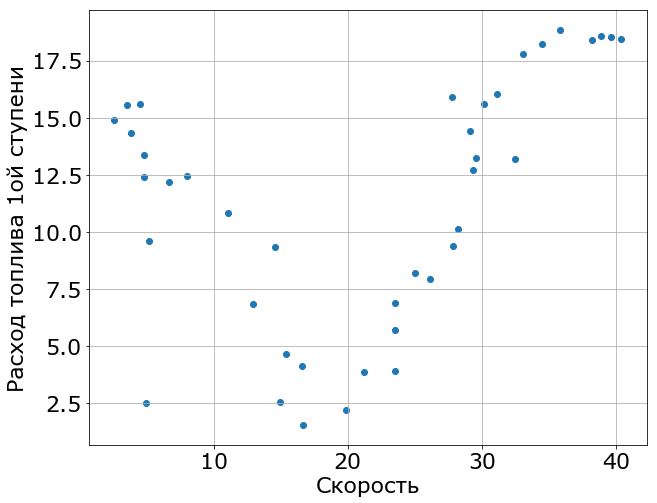

In [50]:
plot_poly_data(X_train, y_train)

In [51]:
lin_theta = np.array([0.0, 0.0])

alpha = 0.001
iters = 10000
X_wo = np.column_stack([np.ones_like(X_train), X_train])
lin_theta_opt = gradient_descent(lin_theta, X_wo, y_train, alpha, iters)

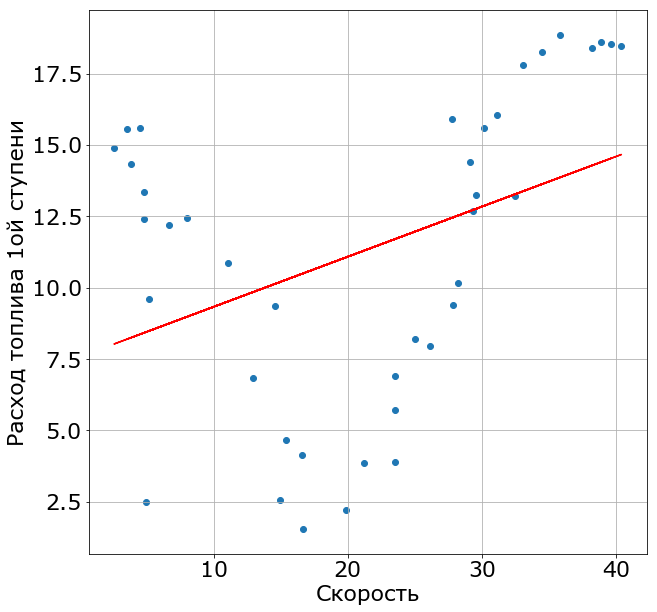

In [52]:
visualize_prediction(X_train, y_train, linear_function(X_wo, lin_theta_opt))

# Полиномиальная регрессия

Линейная регрессия хорошо работает в тех случаях, когда имеется линейная зависимость между . Но что делать, если данные распределены нелинейно, если зависимость более сложная, как в нашем примере?
В данном случае линейная регрессия слишком грубо описывает данные, что приводит к большим ошибкам.


## Полиномы

Полиномом степени n называется функция:

$poly(X) = k_n X^n + k_{n-1} X^{n-1}  \ldots + k_1 X + k_0$. 

Известное вам квадратное уравнение — это полином второй степени. 

$quadratic(X) = k_2 X^2 + k_1 X + k_0$, или как вы привыкли его видеть: 

$quadratic(X) = a X^2 + b X + c$.

### Пример параболы

In [55]:
plot_parabola()

A Jupyter Widget

### Пример полиномов больших степеней

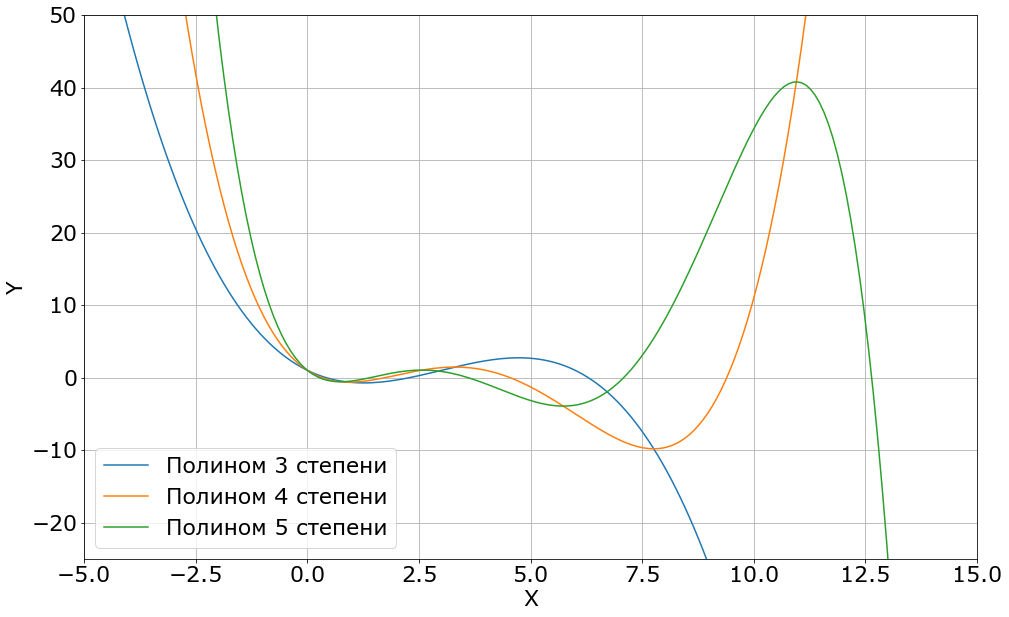

In [54]:
plot_polynoms()

В общем случае полином $n$-ой степени может иметь до $n$ корней, а значит пересекает ось $Х$ в $n$ точках (если $n$ корней). Для того, чтобы это было возможно он должен "колебаться" вверх-вниз. Т.е. чем выше степень полинома, тем больше таких "волн" в нем может быть.

Соответственно, такие функции могут описать более сложные зависимости данных.

Начнем опять с простого примера - возьмем один признак, чтобы показать, как работает полиномиальная регрессия.

Очевидно, ошибка очень большая! **Попробуем полиномы!**
Т.е. если мы используем, например, многочлен второй степени, мы можем получить результаты лучше.

## Полиномы для линейной регрессии

Давайте рассмотрим решение задачи на примере многочлена степени 5. Напомним, наша задача - нахождение расхода топлива 1-ой ступени  в зависимости от скорости. Предположим что решение будет иметь сследующий вид:

$y = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + \theta_4 x^4 + \theta_5 x^5$

Такая модель по прежнему называется линейной, поскольку все коэффициенты (а т.е. веса модели) линейны. Квадраты и прочие степени появились только у $x$, т.е. у признаков модели. Получение таких признаков достигается просто возведением в нужную степень. Т.е. теперь мы будем передавать в модель не один признак $x$, a набор признаков $[x, x^2, x^3, x^4, x^5]$.

Пример:
у нас имеется набор данных:
одна строка - один пример данных

| Признак | Целевые метки |
|---------|---------------|
| $x$       | $y$             |
| 4.09    | 24            |
| 4.96    | 21.6          |
| ...     | ...           |


Что будет теперь:

| Признаки |   -   |  -  |  -  |  -   | Целевые метки |
|----------|-------|-----|-----|------|---------------|
| $x$      | $x^2$ | $x^3$ | $x^4$ | $x^5$  | $y$            |
| 4.09     | 16.73 | 68.42  | 279.83 | 1144.5 | 24            |
| 4.96     | 24.6 | 122.02 | 605.24 | 3001.98 | 21.6          |
| ...      | ...   | ... | ... | ...  | ...           |

Это до сих пор линейая регрессия потому что:

$y = \theta_0 + \theta_1 x + \theta_2 x_2 + \theta_3 x_3 + \theta_4 x_4 + \theta_5 x_5$,

где 


$x_2 = x^2$

$x_3 = x^3$

$x_4 = x^4$

$x_5 = x^5$.

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error

poly_transformer = PolynomialFeatures(5)
X_poly = poly_transformer.fit_transform(X_train.reshape(-1,1))

In [64]:
print(X_poly)

[[ 1.000  5.000 25.000 125.000 625.000 3125.000]
 [ 1.000 16.600 275.560 4574.296 75933.314 1260493.006]
 [ 1.000  8.000 64.000 512.000 4096.000 32768.000]
 [ 1.000 26.150 683.822 17881.958 467613.212 12228085.481]
 [ 1.000 14.600 213.160 3112.136 45437.186 663382.910]
 [ 1.000 40.400 1632.160 65939.264 2663946.266 107623429.130]
 [ 1.000 21.200 449.440 9528.128 201996.314 4282321.848]
 [ 1.000 23.500 552.250 12977.875 304980.062 7167031.469]
 [ 1.000 38.200 1459.240 55742.968 2129381.378 81342368.624]
 [ 1.000 25.050 627.503 15718.938 393759.388 9863672.657]
 [ 1.000 29.350 861.423 25282.750 742048.724 21779130.035]
 [ 1.000 28.200 795.240 22425.768 632406.658 17833867.744]
 [ 1.000 11.050 122.103 1349.233 14909.021 164744.677]
 [ 1.000  4.850 23.522 114.084 553.308 2683.544]
 [ 1.000  4.850 23.522 114.084 553.308 2683.544]
 [ 1.000  3.850 14.823 57.067 219.707 845.870]
 [ 1.000 27.850 775.623 21601.087 601590.263 16754288.811]
 [ 1.000 29.550 873.202 25803.134 762482.606 22531361.007

In [58]:
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)
X_poly_scaled[:, 0] = 1

In [59]:
X_poly_scaled

array([[ 1.000, -1.360, -1.122, -0.925, -0.784, -0.682],
       [ 1.000, -0.375, -0.615, -0.693, -0.682, -0.639],
       [ 1.000, -1.105, -1.043, -0.905, -0.779, -0.681],
       [ 1.000,  0.437,  0.210,  0.002, -0.153, -0.258],
       [ 1.000, -0.544, -0.742, -0.769, -0.723, -0.660],
       [ 1.000,  1.647,  2.128,  2.512,  2.814,  3.054],
       [ 1.000,  0.016, -0.264, -0.434, -0.512, -0.534],
       [ 1.000,  0.212, -0.056, -0.254, -0.373, -0.434],
       [ 1.000,  1.460,  1.778,  1.980,  2.092,  2.142],
       [ 1.000,  0.343,  0.096, -0.111, -0.253, -0.340],
       [ 1.000,  0.709,  0.569,  0.389,  0.218,  0.074],
       [ 1.000,  0.611,  0.435,  0.240,  0.070, -0.063],
       [ 1.000, -0.846, -0.926, -0.861, -0.765, -0.677],
       [ 1.000, -1.373, -1.125, -0.926, -0.784, -0.683],
       [ 1.000, -1.373, -1.125, -0.926, -0.784, -0.683],
       [ 1.000, -1.458, -1.143, -0.929, -0.784, -0.683],
       [ 1.000,  0.581,  0.396,  0.197,  0.028, -0.101],
       [ 1.000,  0.726,  0.593,

In [65]:
regressor = LinearRegression().fit(X_poly_scaled, y_train)
y_pred = regressor.predict(X_poly_scaled)
mean_squared_error(y_train, y_pred)

5.9775678497589375

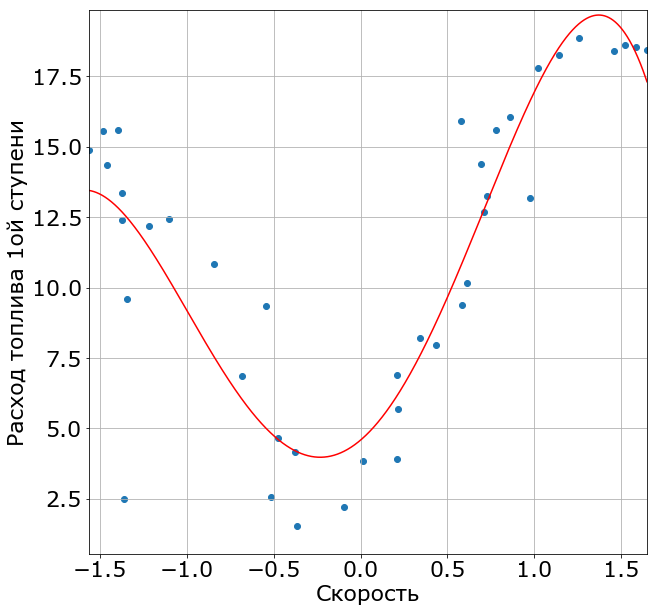

In [68]:
plot_poly_results(X_poly_scaled, y_train, poly_transformer, scaler, regressor)

Алгоритм для полиномиальной регресии

1. Сгенерировать полиномиальные фичи
2. Стандартизировать параметры (кроме единочной колонки)
3. Обучиить линейную регресию
4. Оценить результат

In [72]:
interactive_polynom(X_train, y_train)

A Jupyter Widget

In [73]:
X_test, y_test = get_more_data_for_polynom()

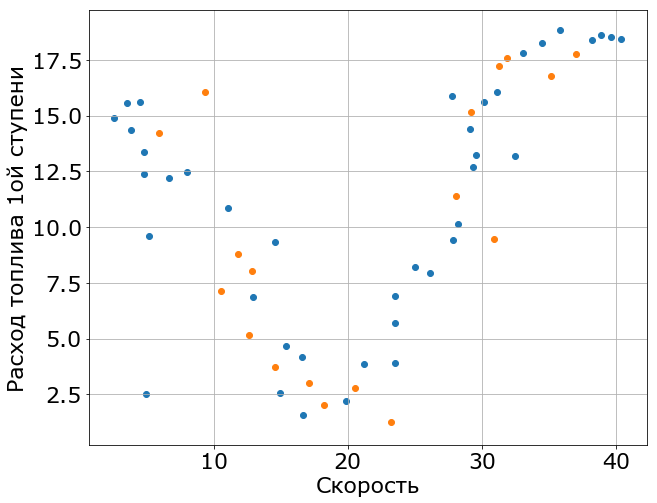

In [78]:
plot_poly_data(X_train, y_train, X_test, y_test)

In [75]:
interactive_polynom(X_train, y_train, X_test, y_test)

A Jupyter Widget

# Оценка результа

## MAE

$MAE = \frac{1}{N}\sum_{i=0}^{N}{|\hat{y_i} - y_i|}= \frac{1}{N} \sum_{i=0}^{N}{|X_i\Theta - y_i|}$

Это то, насколько в среднем ошибается наша модель.

In [87]:
from sklearn.metrics import mean_absolute_error

In [89]:
print(mean_absolute_error(y_train, y_pred))

1.6505537594274506


In [91]:
X_test_poly = poly_transformer.transform(X_test.reshape(-1,1))
X_test_poly = scaler.transform(X_test_poly)
X_test_poly[:, 0] = 1
y_test_pred = regressor.predict(X_test_poly)


In [92]:
print(mean_absolute_error(y_test, y_test_pred))

2.3141765459765247


### МАЕ как функция ошибки

В общем случае производная от $|x|$ не определена в точке 0, во всех остальных случаях ее можно определть, как $|x|'= \dfrac{|x|}{x}$.

В нашем случае мы можем доопределить производную от $|x|$ в нуле значением 0. Тогда она совпадет с функцией знака:
\begin{equation*}
 sign(x) = 
 \begin{cases}
   1 &\text{x > 0}\\
   0 &\text{x = 0}\\
   -1 &\text{x < 0}
 \end{cases}
\end{equation*}

Теперь мы можем посчитать градиент функции потерь:  
\begin{equation*}
\frac{\partial J(\Theta)}{\partial \theta_j} = \frac{1}{N} \sum_{i=1}^{N} sign(X_i\Theta - y_i) x_{ij}
\end{equation*}

\begin{equation*}
\nabla J(\Theta) = 
 \begin{bmatrix}
   \frac{1}{N} \sum_{i=1}^{N} sign(X_i\Theta - y_i)x_{i0}\\
   \frac{1}{N} \sum_{i=1}^{N} sign(X_i\Theta - y_i)x_{i1}\\
   \cdots\\
   \frac{1}{N} \sum_{i=1}^{N} sign(X_i\Theta - y_i)x_{im}\\
 \end{bmatrix}
\end{equation*}


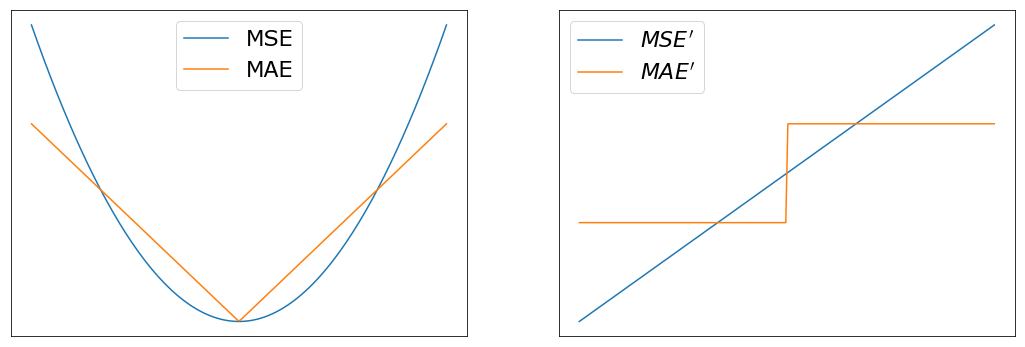

In [115]:
fig, axis = plt.subplots(1, 2, figsize=(18, 6))
ks = np.linspace(-1.5, 1.5, 200)

axis[0].plot(ks, ks**2, label="MSE")
axis[0].plot(ks, np.abs(ks), label="MAE")
axis[0].grid()
axis[0].set_xticks([]) 
axis[0].set_yticks([])
axis[0].legend()

axis[1].plot(ks, 2*ks, label="$MSE'$")
axis[1].plot(ks, np.sign(ks), label="$MAE'$")
axis[1].legend()
axis[1].grid()
axis[1].set_xticks([]) 
axis[1].set_yticks([])


plt.show()